In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle


In [3]:
df = pd.read_csv('../Dataset/large_twitch_features.csv')
df_filtered = df[(df['views'] > 1e4)]

with open('../Dataset/color_map.pkl', 'rb') as f:
    color_map = pickle.load(f)
    
with open('../Dataset/twitch_graph.gpickle', 'rb') as f:
    G = pickle.load(f)

In [8]:
#This takes about 5 minutes, you can skip this part and go to the cell where df_filtered is loaded
degree_centrality = nx.degree_centrality(G)
pagerank = nx.pagerank(G, alpha=0.85)
eigenvector_centrality = nx.eigenvector_centrality(G)

betweenness = np.load("../precomputed/betweenness.npy")
closeness = np.load("../precomputed/closeness.npy")
nodes = np.load("../precomputed/nodes.npy")

betweenness_centrality = {n: c for n, c in zip(nodes, betweenness)}
closeness_centrality = {n: c for n, c in zip(nodes, closeness)}

clustering_centrality = nx.clustering(G)

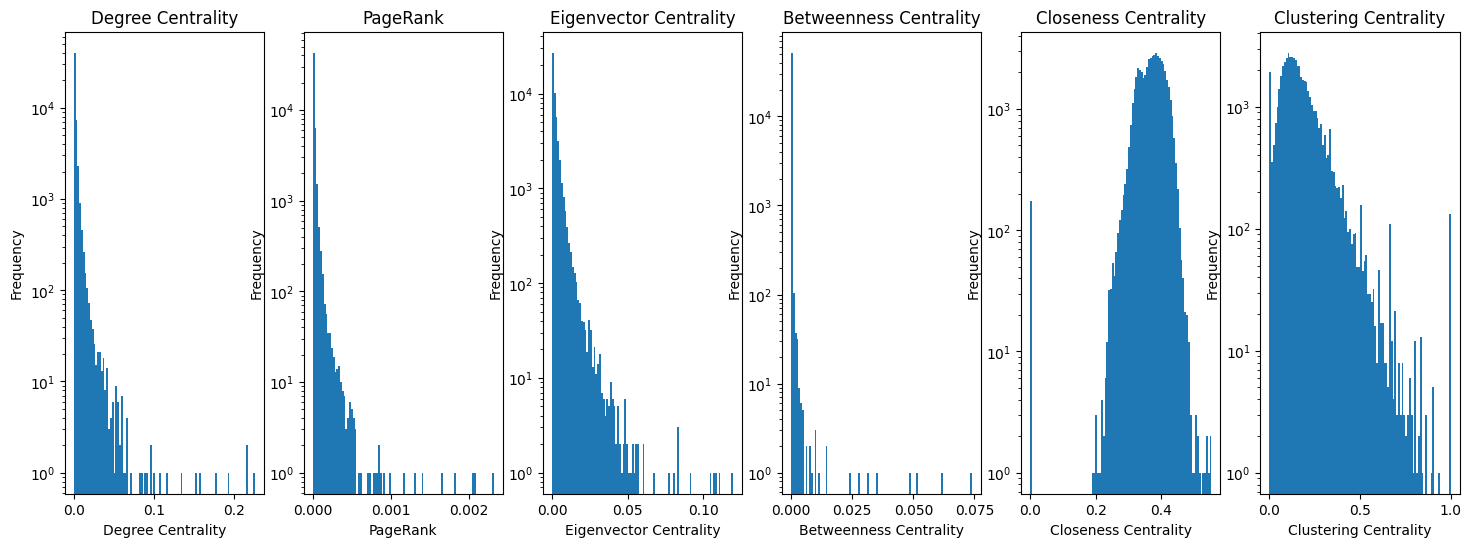

In [9]:
#plot histograms of degree centrality, pagerank, and eigenvector centrality
plt.figure(figsize=(18, 6))
plt.subplot(1, 6, 1)
plt.hist(list(degree_centrality.values()), bins=100, log=True)
plt.title('Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 6, 2)
plt.hist(list(pagerank.values()), bins=100, log=True)

plt.title('PageRank')
plt.xlabel('PageRank')
plt.ylabel('Frequency')

plt.subplot(1, 6, 3)
plt.hist(list(eigenvector_centrality.values()), bins=100, log=True)
plt.title('Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 6, 4)
plt.hist(list(betweenness_centrality.values()), bins=100, log=True)
plt.title('Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 6, 5)
plt.hist(list(closeness_centrality.values()), bins=100, log=True)
plt.title('Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 6, 6)
plt.hist(list(clustering_centrality.values()), bins=100, log=True)
plt.title('Clustering Centrality')
plt.xlabel('Clustering Centrality')
plt.ylabel('Frequency')

plt.show()

In [10]:
degree_centrality_df = pd.DataFrame({
    'numeric_id': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values())
})

df_filtered = df_filtered.merge(degree_centrality_df, on='numeric_id')

pagerank_df = pd.DataFrame({
    'numeric_id': list(pagerank.keys()),
    'pagerank': list(pagerank.values())
})

df_filtered = df_filtered.merge(pagerank_df, on='numeric_id')

eigenvector_centrality_df = pd.DataFrame({
    'numeric_id': list(eigenvector_centrality.keys()),
    'eigenvector_centrality': list(eigenvector_centrality.values())
})

df_filtered = df_filtered.merge(eigenvector_centrality_df, on='numeric_id')

betweenness_centrality_df = pd.DataFrame({
    'numeric_id': list(betweenness_centrality.keys()),
    'betweenness_centrality': list(betweenness_centrality.values())
})

df_filtered = df_filtered.merge(betweenness_centrality_df, on='numeric_id')

closeness_centrality_df = pd.DataFrame({
    'numeric_id': list(closeness_centrality.keys()),
    'closeness_centrality': list(closeness_centrality.values())
})

df_filtered = df_filtered.merge(closeness_centrality_df, on='numeric_id')

clustering_centrality_df = pd.DataFrame({
    'numeric_id': list(clustering_centrality.keys()),
    'clustering_centrality': list(clustering_centrality.values())
})

df_filtered = df_filtered.merge(clustering_centrality_df, on='numeric_id')

In [57]:
#save the dataframe
df_filtered.to_csv('large_twitch_features_centrality.csv', index=False)

In [ ]:
#load the dataframe
df_filtered = pd.read_csv('../Dataset/large_twitch_features_centrality.csv')

In [61]:
df_filtered.sort_values(by='clustering_centrality', ascending=False).head(10)

views  mature  life_time  created_at  updated_at  numeric_id  \
25532   21312       1       1240  2015-05-21  2018-10-12       82245   
51453   47666       0       1080  2015-10-28  2018-10-12      165958   
3008    72375       0        887  2016-05-08  2018-10-12        9603   
21206   16570       0        885  2016-05-10  2018-10-12       68266   
21159   14247       1        490  2017-06-09  2018-10-12       68110   
12529  181831       0        477  2017-06-22  2018-10-12       40284   
10469   22978       0        661  2016-12-20  2018-10-12       33487   
34337   17557       1       2403  2012-03-07  2018-10-05      110257   
41505   12575       1        496  2017-06-03  2018-10-12      133794   
40119   12459       1        193  2018-04-02  2018-10-12      129284   

       dead_account language  affiliate  degree_centrality  pagerank  \
25532             0       FR          1           0.000038  0.000003   
51453             0       RU          1           0.000058  0.000004   
3008              0       TH          0           0.000038  0.000004   
21206             0       KO          0           0.000038  0.000004   
21159             0       FR          1           0.000038  0.000004   
12529             0       JA          0           0.000038  0.000003   
10469             0       ZH          1           0.000038  0.000003   
34337             0       FR          1           0.000038  0.000003   
41505             0       JA          1           0.000058  0.000004   
40119             0       ZH          1           0.000038  0.000003   

       eigenvector_centrality  betweenness_centrality  closeness_centrality  \
25532            6.502014e-06                     0.0              0.269147   
51453            1.043468e-05                     0.0              0.296914   
3008             1.401083e-06                     0.0              0.267764   
21206            2.572245e-06                     0.0              0.272388   
21159            6.178035e-06                     0.0              0.278684   
12529            3.055325e-05                     0.0              0.309881   
10469            1.222847e-05                     0.0              0.303418   
34337            9.165014e-07                     0.0              0.254149   
41505            9.630694e-06                     0.0              0.293743   
40119            1.303281e-05                     0.0              0.300185   

       clustering_centrality  
25532                    1.0  
51453                    1.0  
3008                     1.0  
21206                    1.0  
21159                    1.0  
12529                    1.0  
10469                    1.0  
34337                    1.0  
41505                    1.0  
40119                    1.0

In [69]:
# Show top 10 nodes in terms of views and their ranks for every centrality measure in a new single dataframe
df_rank = df_filtered.copy()  # Create a copy of the original dataframe
df_rank['views_rank'] = df_rank['views'].rank(ascending=False).astype(int)
df_rank['degree_centrality_rank'] = df_rank['degree_centrality'].rank(ascending=False).astype(int)
df_rank['pagerank_rank'] = df_rank['pagerank'].rank(ascending=False).astype(int)
df_rank['eigenvector_centrality_rank'] = df_rank['eigenvector_centrality'].rank(ascending=False).astype(int)
df_rank['betweenness_centrality_rank'] = df_rank['betweenness_centrality'].rank(ascending=False).astype(int)
df_rank['closeness_centrality_rank'] = df_rank['closeness_centrality'].rank(ascending=False).astype(int)
df_rank['clustering_centrality_rank'] = df_rank['clustering_centrality'].rank(ascending=False).astype(int)

# Sort the dataframe by views and show the top 20 nodes
df_rank = df_rank.sort_values(by='views', ascending=False)

# show df_rank but only columns with ranks
df_rank[['views', 'language', 'views_rank', 'degree_centrality_rank', 'pagerank_rank', 'eigenvector_centrality_rank', 'betweenness_centrality_rank', 'closeness_centrality_rank', 'clustering_centrality_rank']].head(20)

views language  views_rank  degree_centrality_rank  pagerank_rank  \
30012  384396587       RU           1                    3444            665   
40323  368912220       EN           2                      87             90   
19221  340602050       EN           3                       1              1   
39988  297117159       EN           4                      16             13   
44835  294116493       EN           5                      23             20   
34362  264643346       EN           6                       5              5   
39000  243451177       EN           7                       3              3   
20050  240718261       EN           8                       7              6   
22098  218559516       EN           9                       4              2   
50002  213931993       EN          10                      40             36   
16361  206941623       EN          11                       6              7   
8235   203471447       EN          12                      20             19   
49076  202252218       EN          13                     158            128   
10116  202142952       EN          14                       2              4   
39051  179513429       ZH          15                     860            351   
47210  178500544       EN          16                      66             55   
659    177293299       ZH          17                    1609            606   
19728  160422474       EN          18                     181            145   
12244  133196253       EN          19                      68             60   
16319  123729653       PL          20                    2142            620   

       eigenvector_centrality_rank  betweenness_centrality_rank  \
30012                        21346                          490   
40323                          254                          105   
19221                            5                            1   
39988                           61                           13   
44835                          113                           22   
34362                            4                            5   
39000                            2                            4   
20050                            6                            8   
22098                            7                            3   
50002                          124                           38   
16361                            3                            6   
8235                            63                           18   
49076                          390                          117   
10116                            1                            2   
39051                        15098                          378   
47210                          267                           91   
659                          26394                         1345   
19728                          894                          128   
12244                          172                           82   
16319                        12247                          433   

       closeness_centrality_rank  clustering_centrality_rank  
30012                      30769                       50194  
40323                        261                       50171  
19221                          1                       50258  
39988                         18                       50259  
44835                         64                       50242  
34362                          5                       50226  
39000                          2                       50252  
20050                          7                       50209  
22098                          4                       50263  
50002                         72                       50197  
16361                          6                       50175  
8235                          19                       50217  
49076                        138                       50047  
10116                          3        

In [71]:
df_rank.sort_values(by='clustering_centrality_rank', ascending=True)[['language', 'views_rank', 'clustering_centrality_rank', 'degree_centrality_rank']].head(67)

language  views_rank  clustering_centrality_rank  degree_centrality_rank
40119       ZH       45581                          67                   51303
9378        TH        5762                          67                   49158
22896       EN       26446                          67                   51303
1866        EN       24634                          67                   51303
21622       FR       45670                          67                   50820
...        ...         ...                         ...                     ...
9802        RU       14255                          67                   51303
29139       EN       43540                          67                   50820
28211       FR       35666                          67                   50820
37680       RU       40411                          67                   48544
51651       EN       51332                          67                   51303

[67 rows x 4 columns]

In [64]:
df_filtered.loc[df_filtered['numeric_id'] == 81985]

views  mature  life_time  created_at  updated_at  numeric_id  \
25452  36403       0       1434  2014-11-08  2018-10-12       81985   

       dead_account language  affiliate  degree_centrality  pagerank  \
25452             0       EN          1           0.000077  0.000004   

       eigenvector_centrality  betweenness_centrality  closeness_centrality  \
25452                0.000025            6.246226e-09              0.307741   

       clustering_centrality  
25452                    0.0

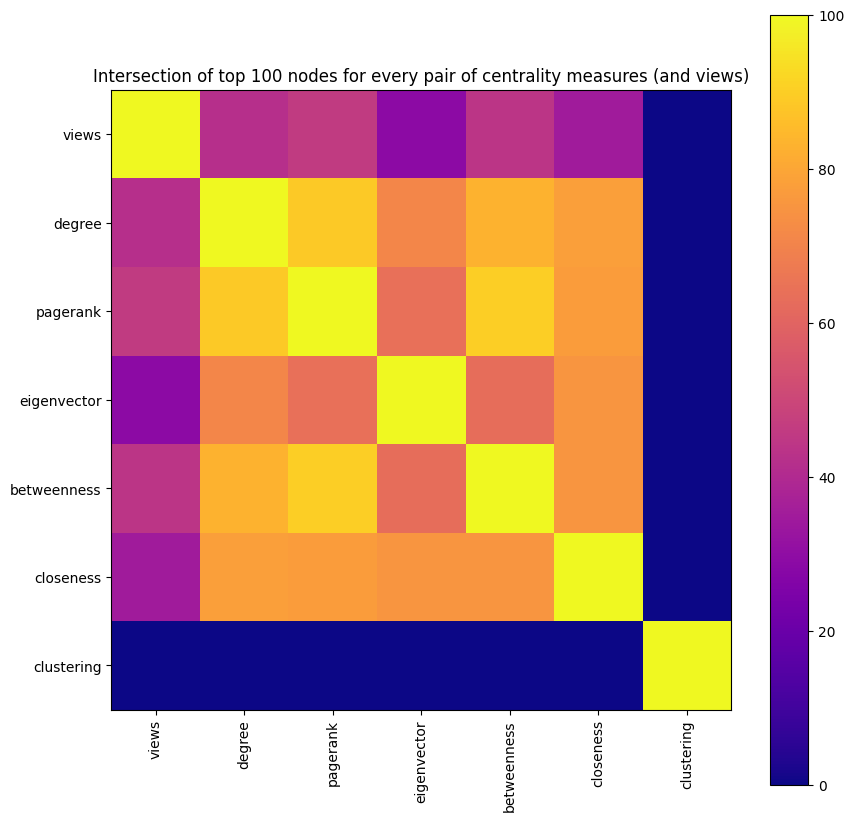

In [51]:
#top 100 nodes for every centrality measure
top_100 = {}
top_100['views'] = list(df_rank.sort_values(by='views', ascending=False).head(100)['numeric_id'])
top_100['degree'] = list(df_rank.sort_values(by='degree_centrality', ascending=False).head(100)['numeric_id'])
top_100['pagerank'] = list(df_rank.sort_values(by='pagerank', ascending=False).head(100)['numeric_id'])
top_100['eigenvector'] = list(df_rank.sort_values(by='eigenvector_centrality', ascending=False).head(100)['numeric_id'])
top_100['betweenness'] = list(df_rank.sort_values(by='betweenness_centrality', ascending=False).head(100)['numeric_id'])
top_100['closeness'] = list(df_rank.sort_values(by='closeness_centrality', ascending=False).head(100)['numeric_id'])
top_100['clustering'] = list(df_rank.sort_values(by='clustering_centrality', ascending=False).head(100)['numeric_id'])

#intersection of top 100 nodes for every pair of centrality measures (+ views), stored in a matrix
intersection_matrix = np.zeros((7, 7))
for i, (name1, nodes1) in enumerate(top_100.items()):
    for j, (name2, nodes2) in enumerate(top_100.items()):
        intersection_matrix[i, j] = len(set(nodes1).intersection(nodes2))

#plot the intersection matrix
plt.figure(figsize=(10, 10))
plt.imshow(intersection_matrix, cmap='plasma')
plt.xticks(np.arange(7), top_100.keys(), rotation=90)
plt.yticks(np.arange(7), top_100.keys())
plt.colorbar()
plt.title('Intersection of top 100 nodes for every pair of centrality measures (and views)')
plt.show()

Text(0.5, 1.0, 'Number of top 100 nodes in English for every centrality measure')

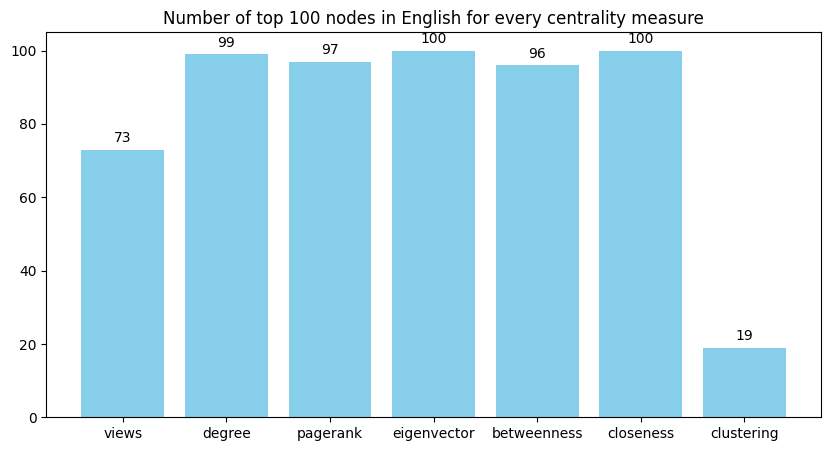

In [58]:
#for every centrality measure, plot how many of the top 100 nodes are in english in a bar plot
centrality = []
top_english = []
for i, (name, nodes) in enumerate(top_100.items()):
    centrality.append(name)
    top_english.append(df_filtered[df_filtered['numeric_id'].isin(nodes)]['language'].value_counts()['EN'])    
#plot the bar plot with the label written on top of each bar
plt.figure(figsize=(10, 5))
plt.bar(centrality, top_english, color='skyblue')
for i, v in enumerate(top_english):
    plt.text(i, v + 2, str(v), ha='center')
plt.title('Number of top 100 nodes in English for every centrality measure')





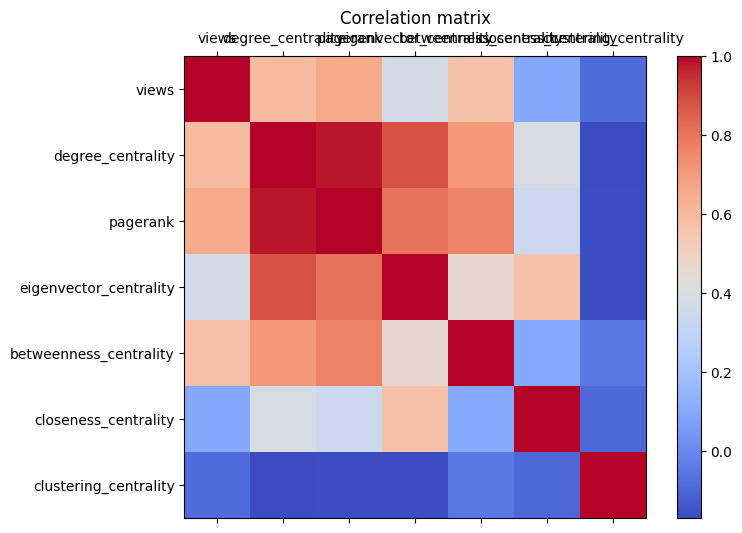

In [50]:
# Plot the correlation matrix of views, degree centrality, PageRank, and eigenvector centrality
correlation_matrix = df_filtered[['views', 'degree_centrality', 'pagerank', 'eigenvector_centrality', 'betweenness_centrality', 'closeness_centrality', 'clustering_centrality']].corr()

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the correlation matrix
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add a colorbar
fig.colorbar(cax)

# Set the labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Correlation matrix')
# Show the plot
plt.show()

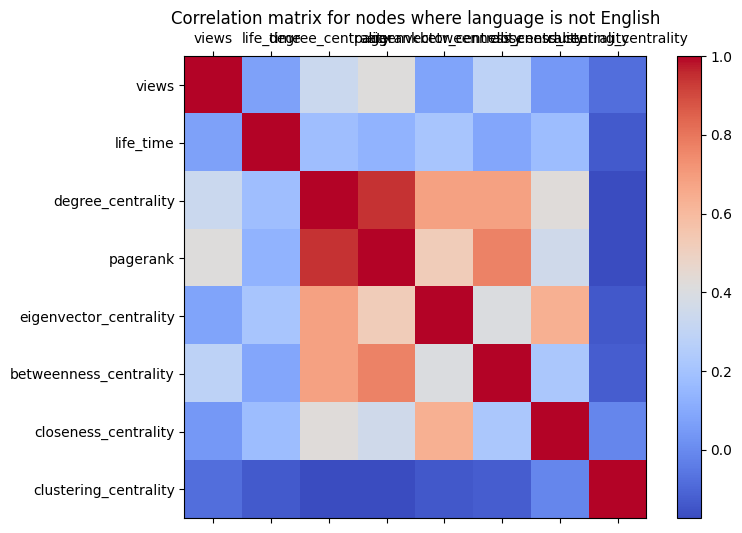

In [53]:
# Plot the correlation matrix of views, degree centrality, PageRank, and eigenvector centrality for nodes where language is not English
df_filtered_english = df_filtered[df_filtered['language'] != 'EN']
correlation_matrix = df_filtered_english[['views', 'life_time', 'degree_centrality', 'pagerank', 'eigenvector_centrality', 'betweenness_centrality', 'closeness_centrality', 'clustering_centrality']].corr()

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the correlation matrix
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add a colorbar
fig.colorbar(cax)

# Set the labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Correlation matrix for nodes where language is not English')
# Show the plot
plt.show()

/Users/aziz/opt/anaconda3/envs/aienv/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(52090, 10)
(51917, 10)


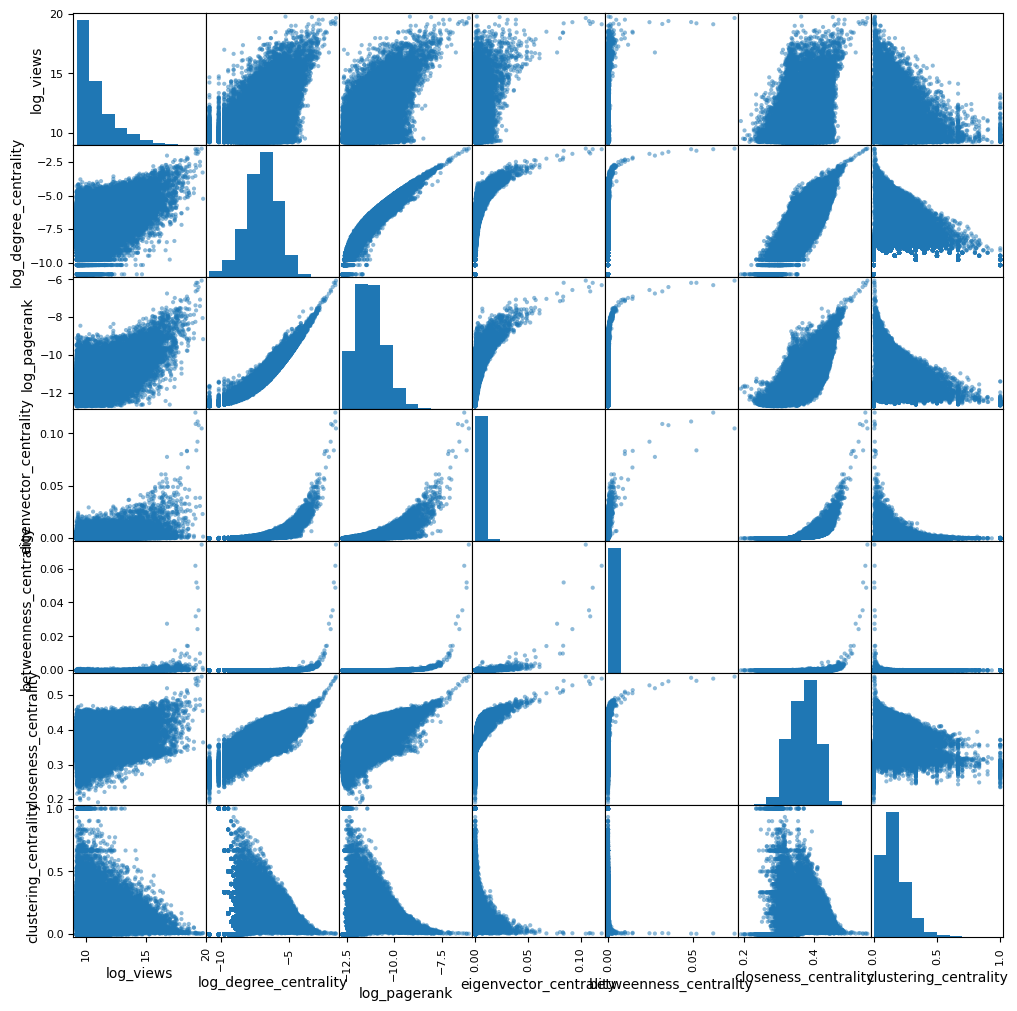

In [72]:
# Plot scatter matrix of pairs of views, degree centrality, PageRank, and eigenvector centrality, with log scale for views
df_scatter = df_filtered[['views', 'degree_centrality', 'pagerank', 'eigenvector_centrality', 'betweenness_centrality', 'closeness_centrality', 'clustering_centrality']].copy()
df_scatter['log_views'] = np.log(df_filtered['views'])
df_scatter['log_degree_centrality'] = np.log(df_filtered['degree_centrality'])
df_scatter['log_pagerank'] = np.log(df_filtered['pagerank'])
print(df_scatter.shape)
#remove rows with NaN values or inf values
df_scatter = df_scatter.replace([np.inf, -np.inf], np.nan).dropna()
print(df_scatter.shape)
scatter_matrix = df_scatter[['log_views', 'log_degree_centrality', 'log_pagerank', 'eigenvector_centrality', 'betweenness_centrality', 'closeness_centrality', 'clustering_centrality']]
pd.plotting.scatter_matrix(scatter_matrix, figsize=(12, 12))
plt.show()

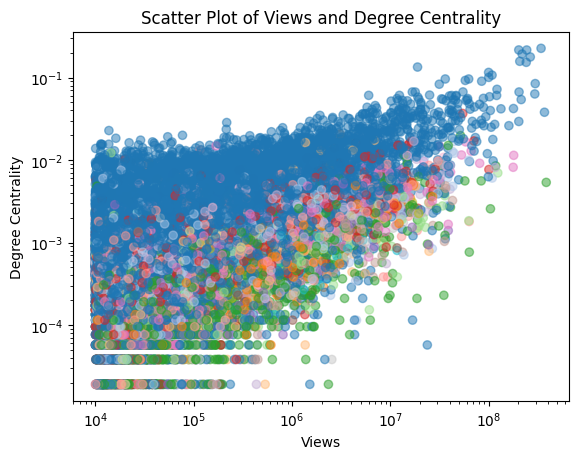

In [73]:
# plot scatter plot of views and degree centrality, color by language

plt.scatter(df_filtered['views'], df_filtered['degree_centrality'], c=[color_map[language] for language in df_filtered['language']], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Views')
plt.ylabel('Degree Centrality')
plt.title('Scatter Plot of Views and Degree Centrality')
plt.show()